# Data Cleaning With Python

Dataset: 

In [1]:
import pandas as pd

In [2]:
covid_data = pd.read_excel('COVID_FINAL_DATA.xlsx')

In [3]:
covid_data.head()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [4]:
covid_data.shape

(440, 12)

In [5]:
covid_data.columns

Index(['Unnamed: 0', 'Cumulative', 'Cumulative  Test positive',
       'Cumulative  tests performed', 'Date', 'Discharged', 'Expired',
       'Home Quarantine', 'New  (last 24 hrs)', 'Region', 'Still admitted',
       'Tests  performed in last 24 hours'],
      dtype='object')

In [6]:
covid_data.drop(["Unnamed: 0"], axis = 1, inplace = True) 

In [7]:
covid_data.shape

(440, 11)

In [8]:
covid_data.columns

Index(['Cumulative', 'Cumulative  Test positive',
       'Cumulative  tests performed', 'Date', 'Discharged', 'Expired',
       'Home Quarantine', 'New  (last 24 hrs)', 'Region', 'Still admitted',
       'Tests  performed in last 24 hours'],
      dtype='object')

In [9]:
covid_data.isnull().sum()

Cumulative                             0
Cumulative  Test positive              0
Cumulative  tests performed            0
Date                                   0
Discharged                             0
Expired                                0
Home Quarantine                      139
New  (last 24 hrs)                     0
Region                                 0
Still admitted                         0
Tests  performed in last 24 hours      0
dtype: int64

In [10]:
covid_data["Home Quarantine"] = covid_data["Home Quarantine"].fillna(0)

In [11]:
covid_data.isnull().sum()

Cumulative                           0
Cumulative  Test positive            0
Cumulative  tests performed          0
Date                                 0
Discharged                           0
Expired                              0
Home Quarantine                      0
New  (last 24 hrs)                   0
Region                               0
Still admitted                       0
Tests  performed in last 24 hours    0
dtype: int64

In [12]:
covid_data.dtypes

Cumulative                             int64
Cumulative  Test positive              int64
Cumulative  tests performed            int64
Date                                  object
Discharged                             int64
Expired                                int64
Home Quarantine                      float64
New  (last 24 hrs)                     int64
Region                                object
Still admitted                         int64
Tests  performed in last 24 hours     object
dtype: object

There is a value 'NO 0' in column 'Tests  performed in last 24 hours '. we will replace it with zero and then will change datatype of column from object to float

In [13]:
covid_data["Tests  performed in last 24 hours"]=covid_data["Tests  performed in last 24 hours"].astype(str)

In [14]:
covid_data["Tests  performed in last 24 hours"]=covid_data["Tests  performed in last 24 hours"].str.replace('No 0', '0')
covid_data.head()

,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,48,2,80,2020-03-11 00:00:00,0,0,0.0,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,0.0,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,0.0,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,0.0,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,0.0,0,KPTD,0,0


In [15]:
covid_data["Tests  performed in last 24 hours"]=covid_data["Tests  performed in last 24 hours"].astype(str).astype(float)
print(covid_data.dtypes)

Cumulative                             int64
Cumulative  Test positive              int64
Cumulative  tests performed            int64
Date                                  object
Discharged                             int64
Expired                                int64
Home Quarantine                      float64
New  (last 24 hrs)                     int64
Region                                object
Still admitted                         int64
Tests  performed in last 24 hours    float64
dtype: object


Now we will change datatype of column 'Date' from object to date

In [16]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [17]:
#covid_data["Region"]=covid_data["Region"].astype(str)
#covid_data["Region"]=covid_data["Region"].str.split(',') 
#covid_data["Region"].dtype=pd.StringDtype()
#dtype=pd.StringDtype())

In [18]:
covid_data.dtypes

Cumulative                                    int64
Cumulative  Test positive                     int64
Cumulative  tests performed                   int64
Date                                 datetime64[ns]
Discharged                                    int64
Expired                                       int64
Home Quarantine                             float64
New  (last 24 hrs)                            int64
Region                                       object
Still admitted                                int64
Tests  performed in last 24 hours           float64
dtype: object

Now, Writing this cleaned dataset to an excel file

In [19]:
covid_data['Date'] = covid_data['Date'].dt.strftime('%Y/%m/%d')
writer = pd.ExcelWriter('covid_cleaned_data.xlsx', engine='xlsxwriter',datetime_format='mmm d yyyy hh:mm:ss')
covid_data.to_excel(writer, 'Sheet1')
writer.save()

In [20]:
#start date 
covid_data.Date.min()

'2020/03/11'

In [21]:
#max date 
covid_data.Date.max()

'2020/05/11'

In [22]:
import matplotlib.pyplot as plt

474057 135542 9827 348342


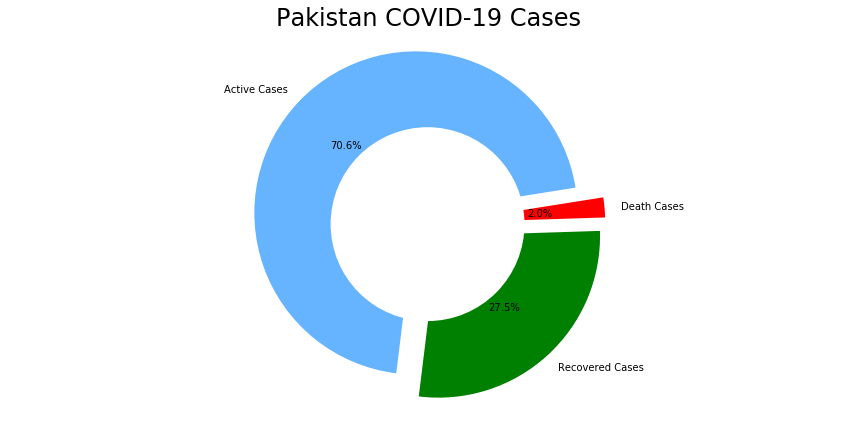

In [26]:
confirmed = covid_data['Cumulative  Test positive'].sum()
recovered = covid_data['Discharged'].sum()
deaths = covid_data['Expired'].sum()
active = confirmed - (recovered - deaths)

print(confirmed, recovered, deaths, active)

labels = ['Active Cases','Recovered Cases','Death Cases']
sizes = [active,recovered,deaths]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.1)
    
plt.figure(figsize= (12,6))
plt.pie(sizes, labels=labels, autopct='%3.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.60,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pakistan COVID-19 Cases',fontsize = 24)
plt.axis('equal')  
plt.tight_layout()

In [27]:
import plotly.express as px
import plotly.express as ex
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import plotly.graph_objects as go
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Cumulative  Test positive'],
                    mode='lines+markers',marker_color='blue',name='Confimned Cases'))
#fig.add_trace(go.Scatter(x=train_df['Date'],y=train_df['Active'], 
#                mode='lines+markers',marker_color='purple',name='Active Cases'))
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Discharged'],
                mode='lines+markers',marker_color='green',name='Recovered'))
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Expired'], 
                mode='lines+markers',marker_color='red',name='Deaths'))
fig.update_layout(title_text='Coronavirus Cases in Pakistan',plot_bgcolor='rgb(180, 170, 175)',width=500, height=500)
fig.show()

In [29]:
#temp = covid_data.groupby(['Date'])['New  (last 24 hrs)','Discharged','Expired'].sum().reset_index()
temp = covid_data[['Date','Tests  performed in last 24 hours']]
fig = px.scatter(temp, x="Date", y="Tests  performed in last 24 hours", color="Tests  performed in last 24 hours",
                 size='Tests  performed in last 24 hours', hover_data=['Tests  performed in last 24 hours'],
                 color_discrete_sequence = ex.colors.cyclical.IceFire)
fig.update_layout(title_text='Trend of Daily Tests performed in Pakistan',
                  plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [304]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Cumulative  tests performed'],
                    mode='lines+markers',marker_color='blue',name='Cumulative tests performed'))
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Cumulative'],
                mode='lines+markers',marker_color='green',name='Cumulative Suspected'))
fig.update_layout(title_text='Cumulative Suspected VS Cumulative tests performed',plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [305]:

evolution = covid_data.groupby('Date').sum()[['Cumulative  Test positive','Discharged', 'Expired']]
evolution['Expiration Rate'] = (evolution['Expired'] / evolution['Cumulative  Test positive']) * 100
evolution['Discharging Rate'] = (evolution['Discharged'] / evolution['Cumulative  Test positive']) * 100

fig = go.Figure()
fig.add_trace(go.Scatter(x=evolution['Cumulative  Test positive'], y=evolution['Expiration Rate'],
                    mode='lines+markers',marker_color='blue',name='Expiratin rate'))
fig.add_trace(go.Scatter(x=evolution['Cumulative  Test positive'], y=evolution['Discharging Rate'], 
                mode='lines+markers',marker_color='red',name='Discharging rate'))
fig.update_layout(title_text='Discharging Rate VS Expiration Rate',plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()